In [16]:
import numpy as np
import pandas as pd

In [17]:
df=pd.read_csv('spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.sample(5)

1. Data cleaning

In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [120]:
df.drop(columns=['unnamed: 2','unnamed: 3','unnamed: 4'],inplace=True)

KeyError: "['unnamed: 2', 'unnamed: 3', 'unnamed: 4'] not found in axis"

In [121]:
columns_to_drop = ['unnamed: 2', 'unnamed: 3', 'unnamed: 4']
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['unnamed: 2', 'unnamed: 3', 'unnamed: 4'] not found in axis"

In [124]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [125]:
df.sample(5)

,v1,v2
3571,ham,"Yup, leaving right now, be back soon"
4000,ham,He's just gonna worry for nothing. And he won'...
4925,ham,"Oh yes, why is it like torture watching england?"
1784,ham,"Dont search love, let love find U. Thats why i..."
4354,ham,"Sorry, I can't help you on this."


In [126]:
df.replace(columns={'v1':"Target",'v2':"Text"
},inplace=True)

TypeError: DataFrame.replace() got an unexpected keyword argument 'columns'

In [127]:
df.replace(columns={'v1':"Target",'v2':"Text"},inplace=True)

TypeError: DataFrame.replace() got an unexpected keyword argument 'columns'

In [ ]:
df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)

In [ ]:
df.sample(5)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['target']=encoder.fit_transform(df['target'])

KeyError: 'target'

In [20]:
df['Target']=encoder.fit_transform(df['Target'])

In [21]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [23]:
df.duplicate().sum()


AttributeError: 'DataFrame' object has no attribute 'duplicate'

In [24]:
df.duplicated().sum()


403

In [25]:
df=df.drop_duplicates(keep='first')

In [26]:
df.shape


(5169, 2)

2. EDA


In [27]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e6c3b078d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

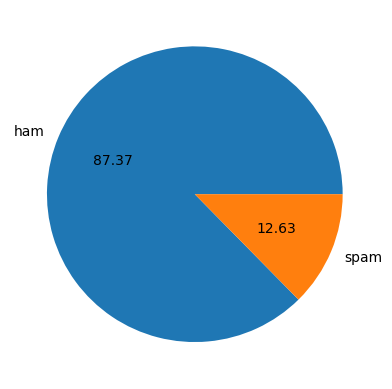

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [29]:
import nltk


In [30]:
!pip install nltk


In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
df['num_characters']=df['Text'].apply(len)

C:\Users\My PC\AppData\Local\Temp\ipykernel_7152\911280584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


In [33]:
df['num_characters'] = df['Text'].apply(len)


C:\Users\My PC\AppData\Local\Temp\ipykernel_7152\2456127275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [34]:
df.loc[:, 'num_characters'] = df['Text'].apply(len)


C:\Users\My PC\AppData\Local\Temp\ipykernel_7152\3714046458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_characters'] = df['Text'].apply(len)


In [35]:
df.head()


,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

KeyError: 'text'

In [37]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [38]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#ham messages
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
#spam messages
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [46]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

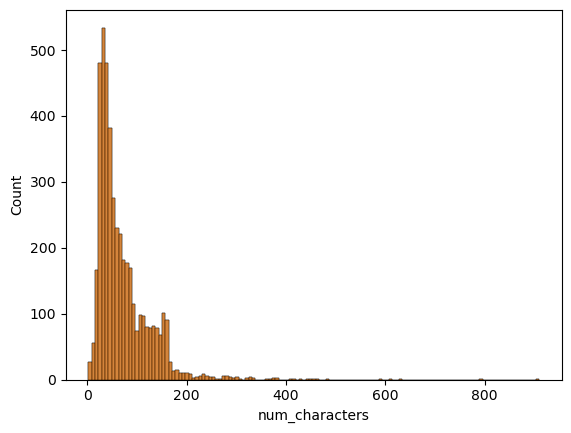

In [48]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==0]['num_characters'])


<Axes: xlabel='num_characters', ylabel='Count'>

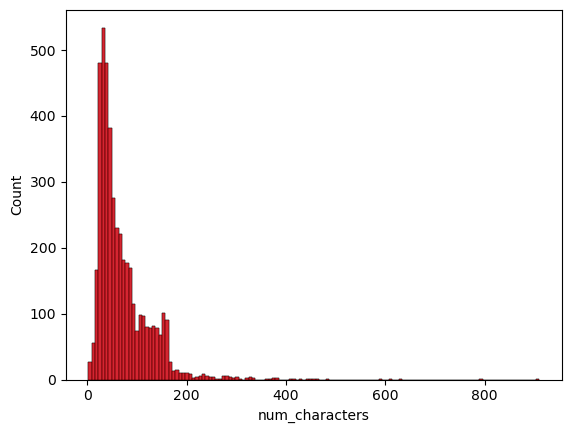

In [49]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==0]['num_characters'],color='red')

# Data preprocessing

In [93]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [94]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [102]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [103]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
        
    for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
    text=y[:]
    y.clear()
        
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [109]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [108]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [113]:
df['transformed_text']=df['Text'].apply(transform_text)

In [114]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [115]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [117]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [118]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,vdhsh11@oksbi,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Starts here


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.sample(5)

,v1,Phrases,Unnamed: 2,Unnamed: 3,Unnamed: 4
1958,ham,AarohiShah @okhdfc,NaN,NaN,NaN
350,ham,IshanSharma @okhdfc,NaN,NaN,NaN
1428,ham,SiyaShah @okybl,"I'll come up""",NaN,NaN
2829,ham,AnikaYadav @okhdfc,NaN,NaN,NaN
799,ham,rjk @okybl,NaN,NaN,NaN


In [5]:
df.shape

(5574, 5)

# Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5574 non-null   object
 1   Phrases     5574 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4',],inplace=True)

In [8]:
df.sample(5)

,v1,Phrases
3394,ham,AbhinavGupta @okhdfc
889,ham,AnayaMishra @okaxl
5211,ham,SaanviMehta @idbi
2964,ham,skylarShr @kbl
324,ham,rachelGreen @oksbi


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,Phrases
1361,ham,AmitJoshi @oksbi
5232,spam,RachitVerma @kbl
4178,ham,AnikaYadav @idbi
3266,ham,SamarVerma @idbi
3123,ham,rohnr @okaxl


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,Phrases
4281,ham,NavyaVerma @kbl
5326,ham,AdvaitSingh @okicici
115,ham,SnehaThakur @oksbi
1497,ham,RahulKumar @okaxl
1685,ham,AmritaThakur @idbi


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,Phrases
0,0,SanyaJoshi @okhdfc
1,0,YugKapoor @okhdfc
2,1,TaraChoudhury @oksbi
3,0,VanyaAgarwal @okaxl
4,0,SuhaniYadav @okaxl


In [17]:
df.isnull().sum()

target     0
Phrases    0
dtype: int64

In [18]:
df.duplicated().sum()

4577

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(997, 2)

# Exploratory data analysis


In [22]:
df.head()

,target,Phrases
0,0,SanyaJoshi @okhdfc
1,0,YugKapoor @okhdfc
2,1,TaraChoudhury @oksbi
3,0,VanyaAgarwal @okaxl
4,0,SuhaniYadav @okaxl


In [23]:
df['target'].value_counts()

0    581
1    416
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e9e4a92a50>,
 [Text(-0.2827474090603451, 1.0630399346542263, 'ham'),
  Text(0.2827474090603448, -1.0630399346542265, 'spam')],
 [Text(-0.15422585948746095, 0.5798399643568507, '58.27'),
  Text(0.15422585948746076, -0.5798399643568508, '41.73')])

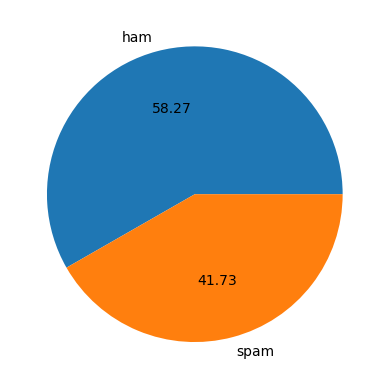

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [26]:
import nltk

In [25]:
!pip install nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['Phrases']

0         SanyaJoshi @okhdfc
1          YugKapoor @okhdfc
2       TaraChoudhury @oksbi
3        VanyaAgarwal @okaxl
4         SuhaniYadav @okaxl
                ...         
5427         BhavyaJain @kbl
5449       RushilReddy @idbi
5497        AhaanSharma @kbl
5566       AnanyaBhat @oksbi
5573             rjk @okhdfc
Name: Phrases, Length: 997, dtype: object

In [28]:
df.loc[:, 'num_characters'] = df['Phrases'].apply(len)


In [29]:
df.loc[:, 'num_characters'] = df['Phrases'].apply(len)


In [30]:
df.head()


,target,Phrases,num_characters
0,0,SanyaJoshi @okhdfc,18
1,0,YugKapoor @okhdfc,17
2,1,TaraChoudhury @oksbi,20
3,0,VanyaAgarwal @okaxl,19
4,0,SuhaniYadav @okaxl,18


In [31]:
df['num_words']=df['Phrases'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df['num_words']=df['Phrases'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()


,target,Phrases,num_characters,num_words
0,0,SanyaJoshi @okhdfc,18,3
1,0,YugKapoor @okhdfc,17,3
2,1,TaraChoudhury @oksbi,20,3
3,0,VanyaAgarwal @okaxl,19,3
4,0,SuhaniYadav @okaxl,18,3


In [34]:
df['num_sentances']=df['Phrases'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,Phrases,num_characters,num_words,num_sentances
0,0,SanyaJoshi @okhdfc,18,3,1
1,0,YugKapoor @okhdfc,17,3,1
2,1,TaraChoudhury @oksbi,20,3,1
3,0,VanyaAgarwal @okaxl,19,3,1
4,0,SuhaniYadav @okaxl,18,3,1


In [36]:
df[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,997.000000,997.0,997.0
mean,17.368104,3.0,1.0
std,2.233351,0.0,0.0
min,8.000000,3.0,1.0
25%,16.000000,3.0,1.0
50%,18.000000,3.0,1.0
75%,19.000000,3.0,1.0
max,23.000000,3.0,1.0


In [38]:
df[df['target'] == 0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,581.000000,581.0,581.0
mean,17.361446,3.0,1.0
std,2.245339,0.0,0.0
min,8.000000,3.0,1.0
25%,16.000000,3.0,1.0
50%,18.000000,3.0,1.0
75%,19.000000,3.0,1.0
max,23.000000,3.0,1.0


# Data Preprocessing


In [39]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
        
    return y

In [40]:
transform_text('hello how are you?')

[]

In [42]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
        
    return y

In [43]:
transform_text('dsib@oksbi')

[]

In [41]:
def transformText(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    return y

In [42]:
transformText('ojdfnBHB@oksbi')

['ojdfnbhb', 'oksbi']

In [43]:
df.sample(5)

,target,Phrases,num_characters,num_words,num_sentances
281,0,vdty @okhdfc,12,3,1
72,0,NavyaVerma @oksbi,17,3,1
802,1,NavyaVerma @okhdfc,18,3,1
2879,1,AarohiShah @okhdfc,18,3,1
307,0,VivaanMehta @okicici,20,3,1


# Model Building

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [46]:
X=cv.fit_transform(df['Phrases']).toarray()

In [47]:
X.shape

(997, 90)

In [48]:
y=df['target'].values

In [49]:
y

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.35
[[38 82]
 [48 32]]
0.2807017543859649


In [55]:
mnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.35
[[38 82]
 [48 32]]
0.2807017543859649


In [56]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.35
[[38 82]
 [48 32]]
0.2807017543859649


In [57]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [61]:
!pip install streamlit


In [ ]:
!streamlit run app.py



In [ ]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_train)  # Fit and transform on your training data


In [ ]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)


In [1]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to C:\Users\My
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)

In [ ]:
import nltk
print(nltk.__version__)


In [ ]:
!streamlit run app.py

